<a href="https://colab.research.google.com/github/premanshsharma/Brain-Tumor-Detection/blob/main/BrainTumorPreImgProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

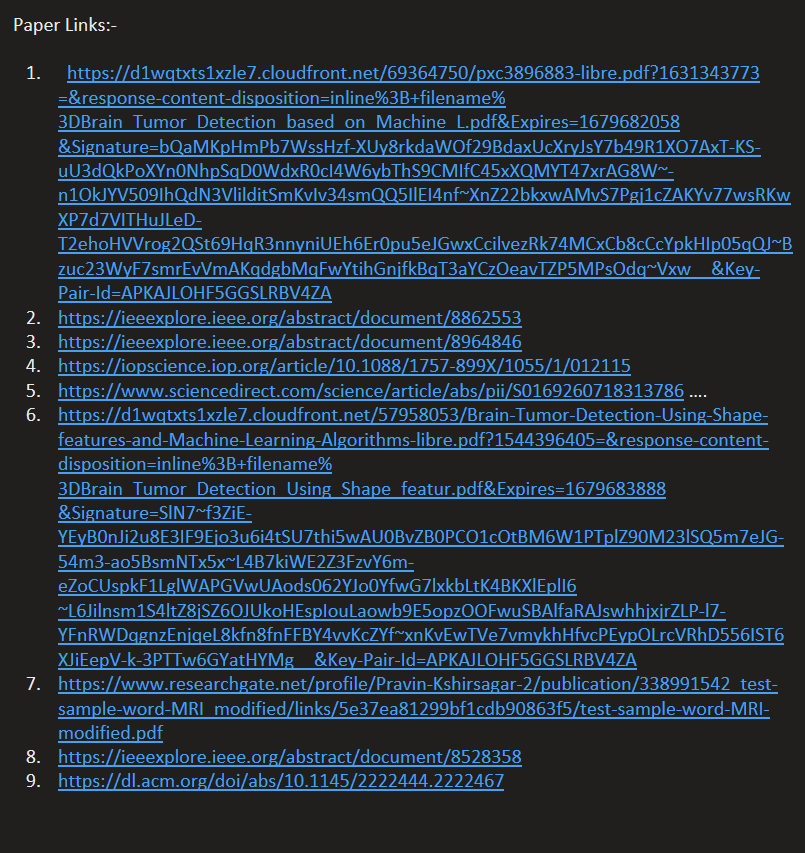

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
import numpy as np
import sklearn 
import cv2
from google.colab.patches import cv2_imshow
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from skimage import io, color
import matplotlib.pyplot as plt
import os

In [3]:
yes_images = "/content/drive/MyDrive/yes"
no_images = "/content/drive/MyDrive/no"

In [4]:
img_y = cv2.imread('/content/drive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/yes/y0.jpg')

In [5]:
img_n = cv2.imread('/content/drive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/no/No12.jpg')

In [6]:
paths_yes = []
for r, d, f in os.walk(r'/content/drive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/yes'):
    for file in f:
        if '.jpg' in file:
            paths_yes.append(os.path.join(r, file))

paths_no = []
for r, d, f in os.walk(r'/content/drive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/no'):
    for file in f:
        if '.jpg' in file:
            paths_no.append(os.path.join(r, file))

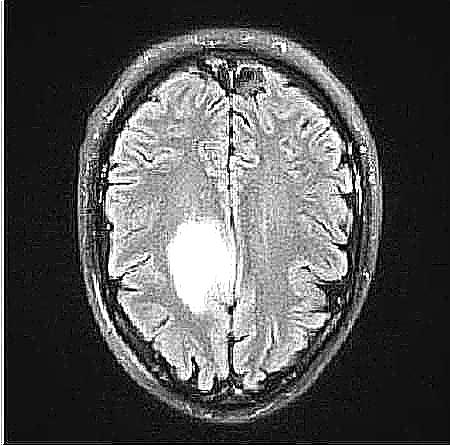

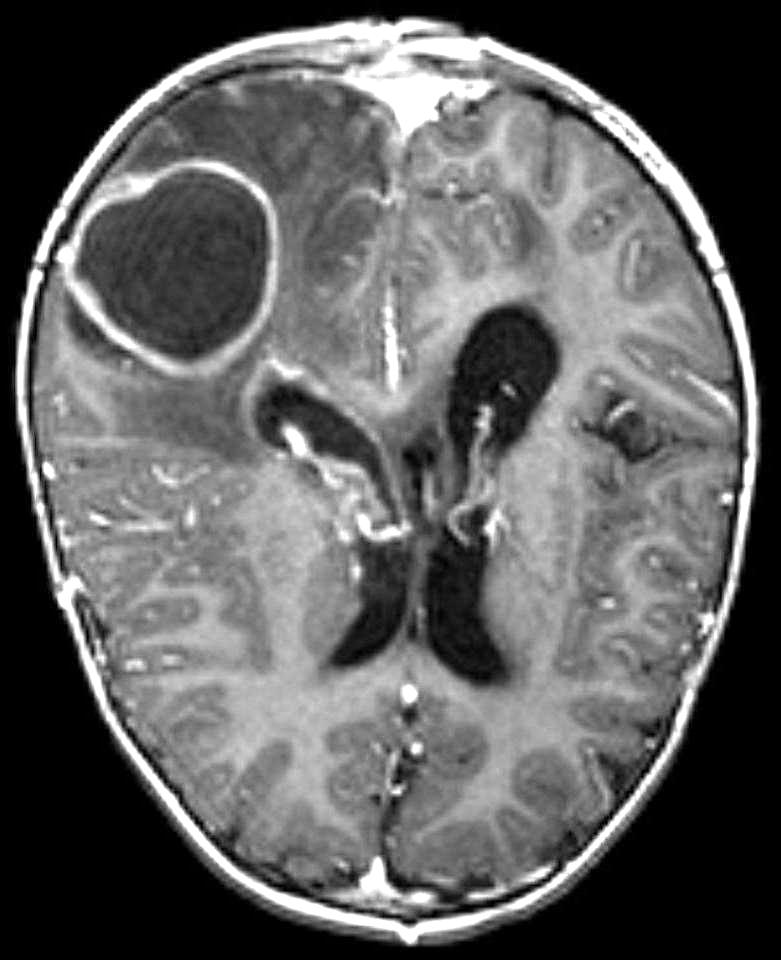

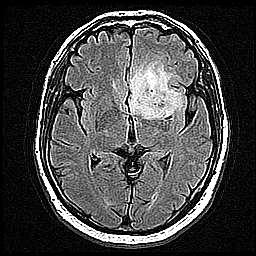

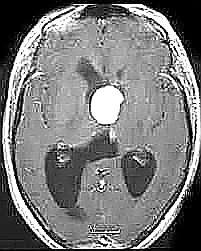

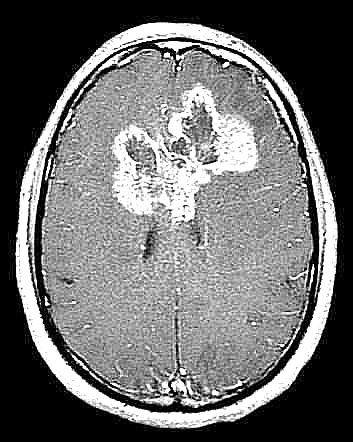

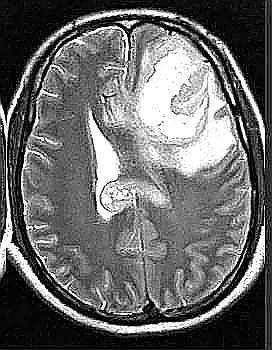

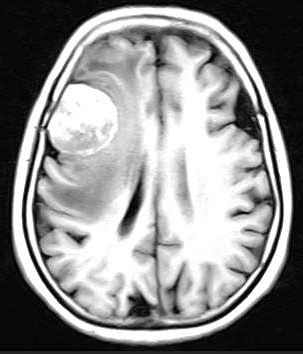

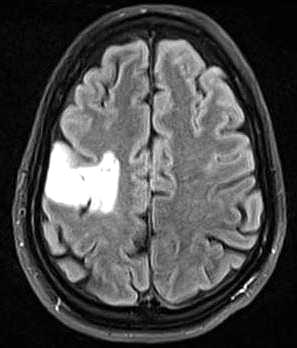

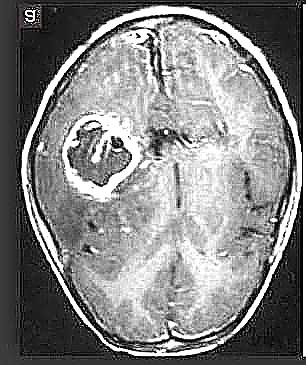

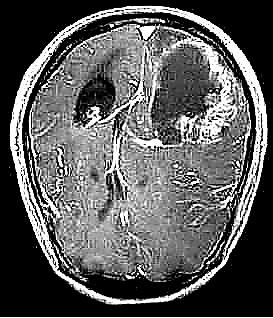

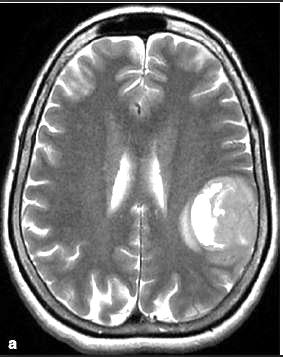

In [7]:
data = []
result = []
def image_input(paths, result_int):
    i = 0
    for path in paths:
        img = cv2.imread(path)
        cv2_imshow(img)
        data.append(img)
        if i == 10:
            break
        i += 1

image_input(paths_yes, 0)
# image_input(paths_no, 1)

#Stastical Methods

In [8]:
def mean_std(img):
    mean, std = cv2.meanStdDev(img, mask=None)
    return mean, std
print(mean_std(img_y))
print(mean_std(img_n))

(array([[89.17613841],
       [89.17613841],
       [89.17613841]]), array([[90.39103785],
       [90.39103785],
       [90.39103785]]))
(array([[53.58868481],
       [53.58868481],
       [53.58868481]]), array([[59.52907645],
       [59.52907645],
       [59.52907645]]))


#HOG, SIFT, ORB
There are a number of feature descriptors out there. Here are a few of the most popular ones:
1. Hog: Histogram of Oriented Gradients
2. SIFT: Scale Invariant Feature Transform
3. SURF: Sppeded-Up Robust Feature (Paitented)
4. ORB: Oriented FAST and Rotated BRIEF

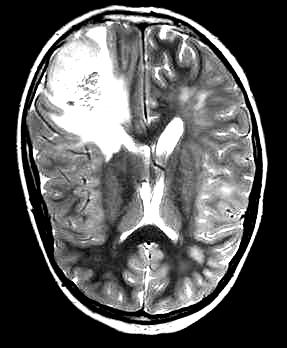

(348, 287, 3)


<ipython-input-9-6083fc8f57e3>:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),


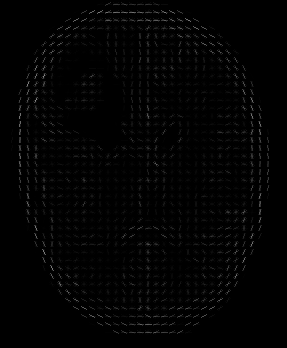

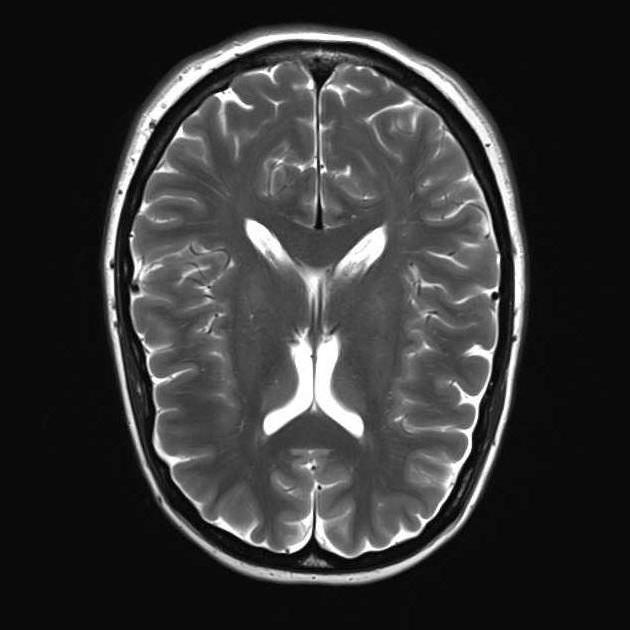

(630, 630, 3)


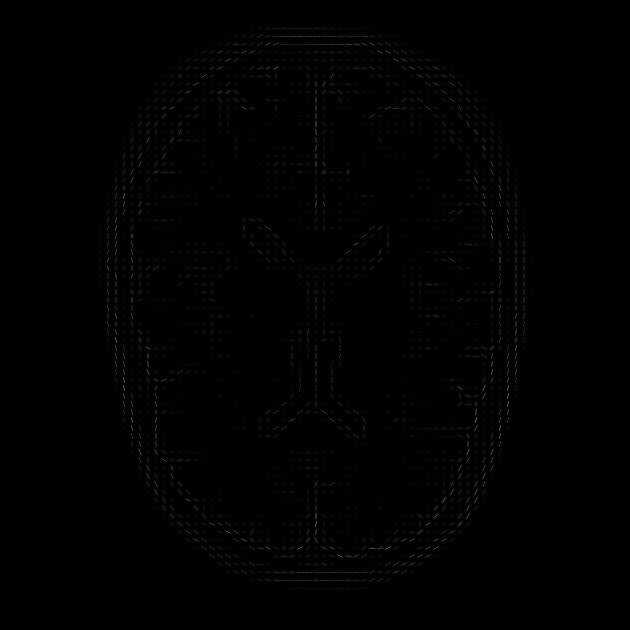

In [9]:

%matplotlib inline
def give_hog(img):
    #reading the image
    cv2_imshow(img)
    print(img.shape)
    #creating hog features 
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
    cv2_imshow(hog_image)

give_hog(img_y)
give_hog(img_n)

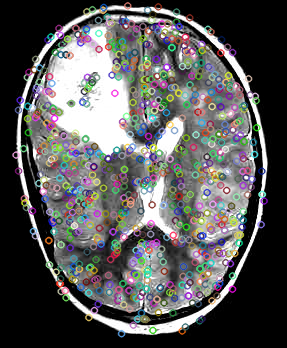

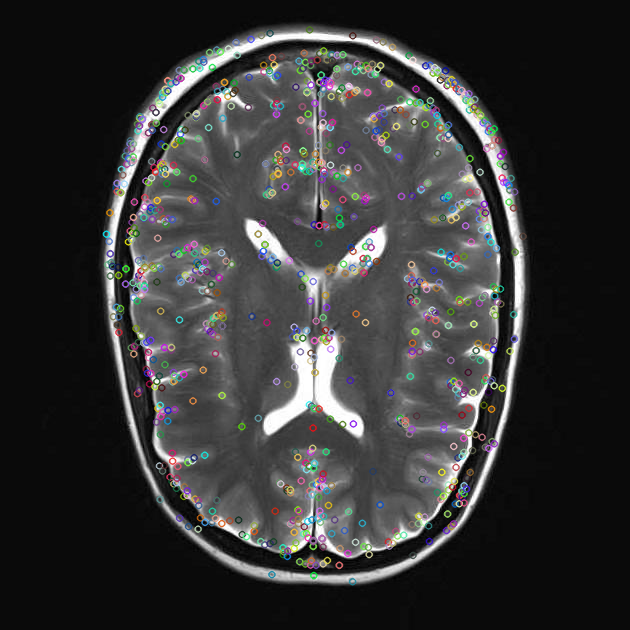

In [10]:
import cv2
def give_sift(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Initialize the SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()

    # Detect and compute keypoints and descriptors
    keypoints, descriptors = sift.detectAndCompute(gray, None)

    # Draw the detected keypoints on the input image
    img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)

    # Save the output image
    cv2.imwrite("output_image.jpg", img_with_keypoints)
    cv2_imshow(img_with_keypoints)

give_sift(img_y)
give_sift(img_n)

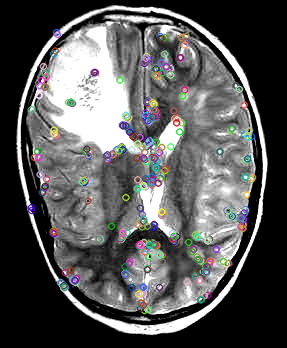

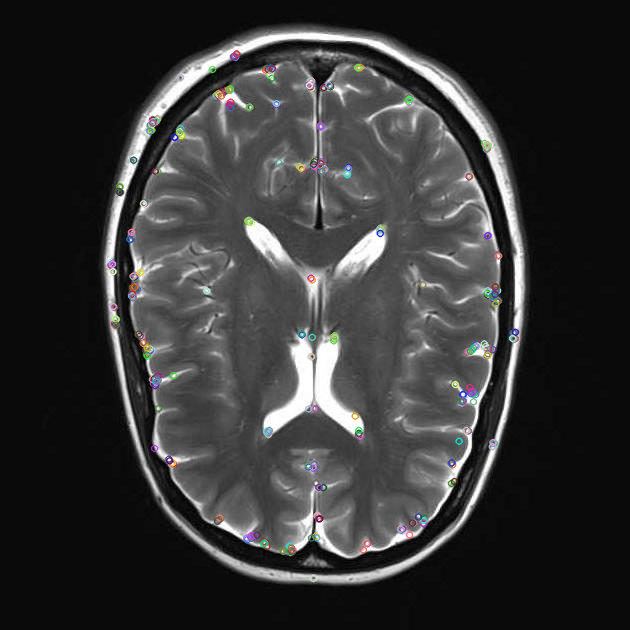

In [11]:
def give_orb(img):
    # Create ORB object
    orb = cv2.ORB_create()

    # Detect keypoints and compute descriptors
    keypoints, descriptors = orb.detectAndCompute(img, None)

    # Draw keypoints on the image
    img_keypoints = cv2.drawKeypoints(img, keypoints, None)

    # Display the image with keypoints
    cv2_imshow(img_keypoints)

give_orb(img_y)
give_orb(img_n)

# Thresholding methods

In [12]:
from google.colab.patches import cv2_imshow
def thresholding(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)
    ret,thresh3 = cv2.threshold(img,150,255,cv2.THRESH_TRUNC)
    ret,thresh4 = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
    ret,thresh5 = cv2.threshold(thresh3,150,255,cv2.THRESH_TOZERO_INV)
    # img = img.astype("uint8")
    # ret,thresh5 = cv2.threshold(img,200,255,cv2.THRESH_OTSU)
    # cv2_imshow(thresh4)
    # titles = ['Original', 'Filter', 'otsu']
    # images - [img, thresh4]
    titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','OTSU']
    images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
    for i in range(6):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

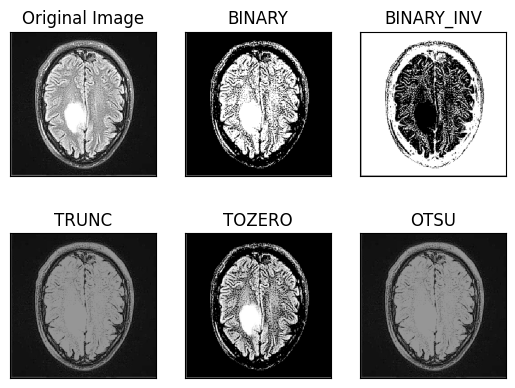

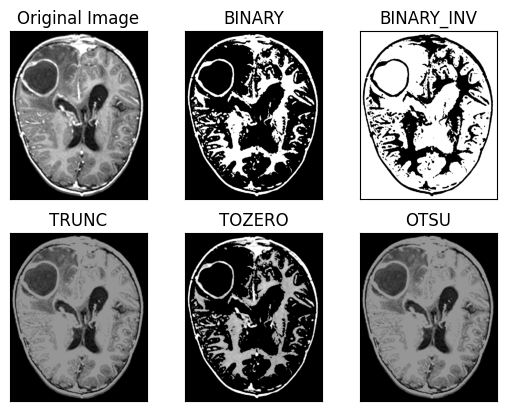

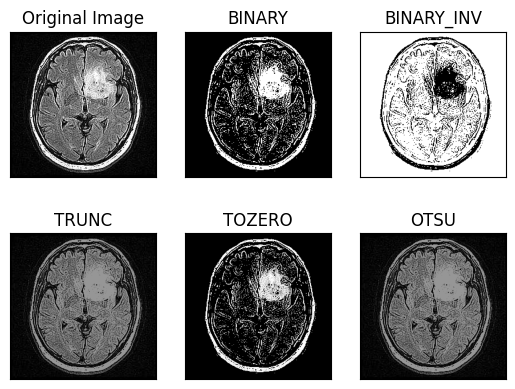

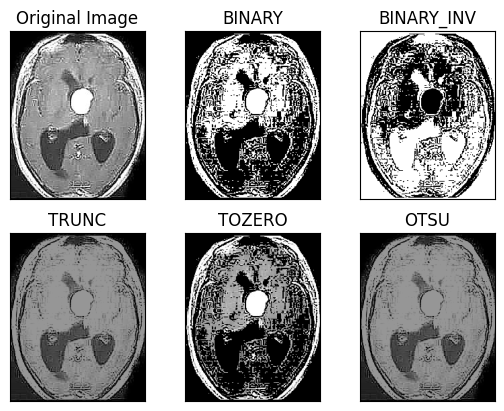

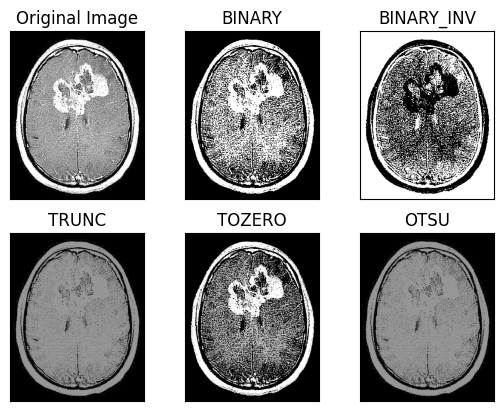

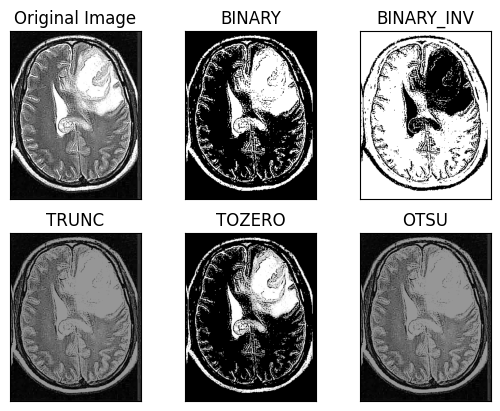

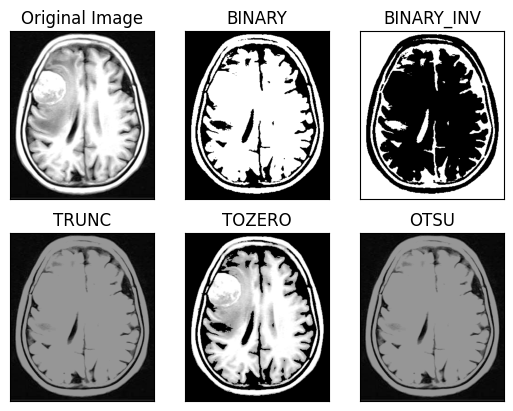

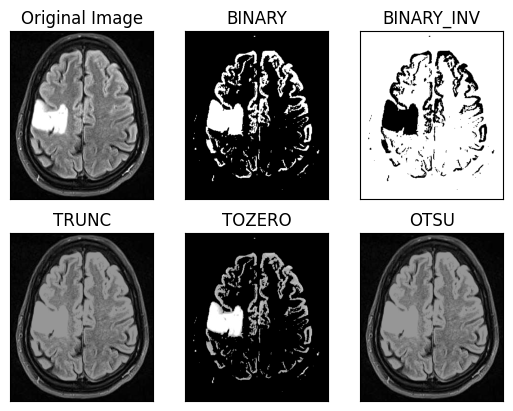

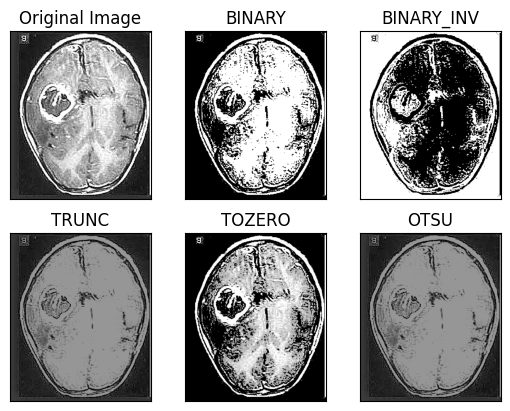

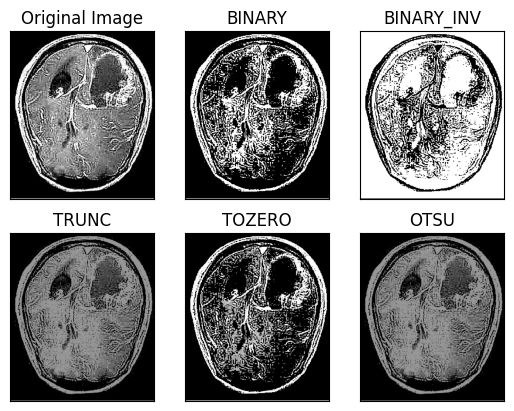

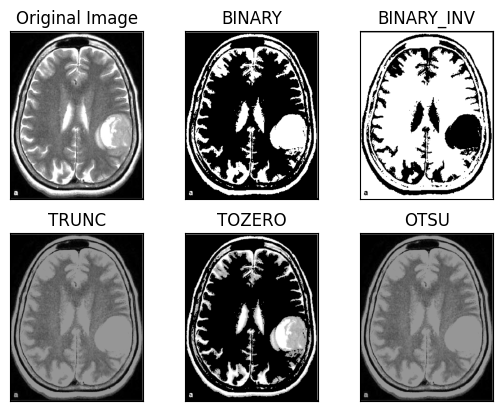

In [13]:
for img in data:
    thresholding(img)
# thresholding(img_n)

# Connected Component Analysis

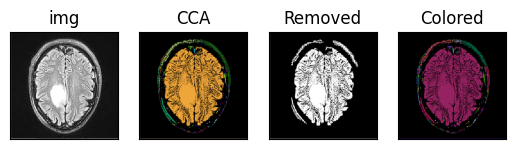

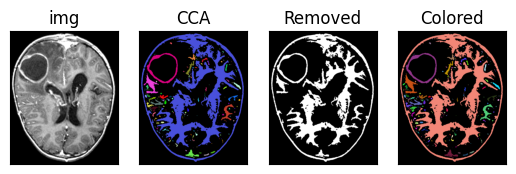

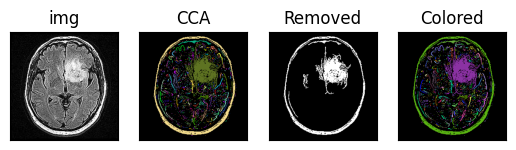

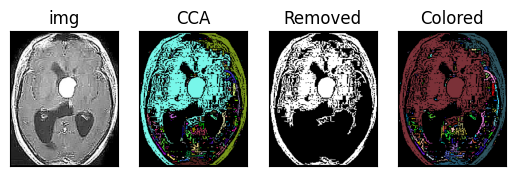

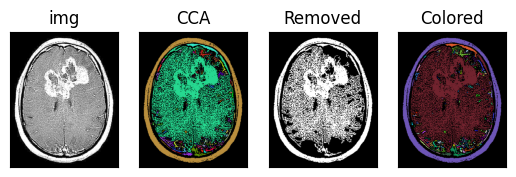

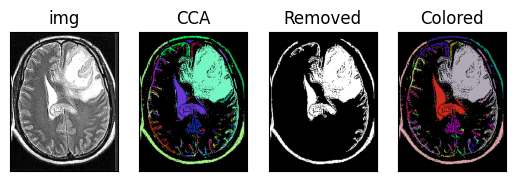

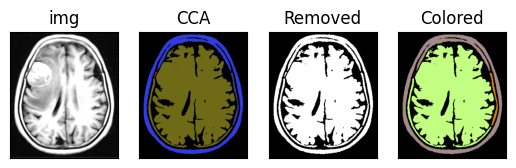

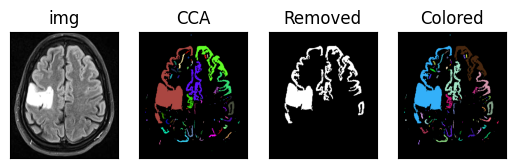

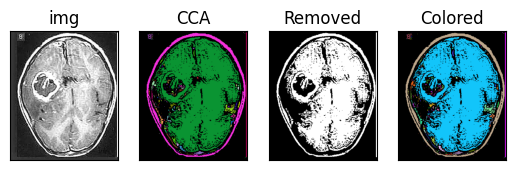

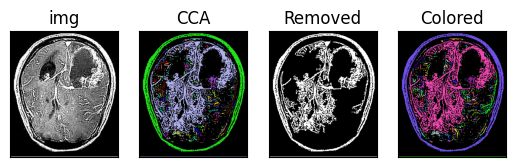

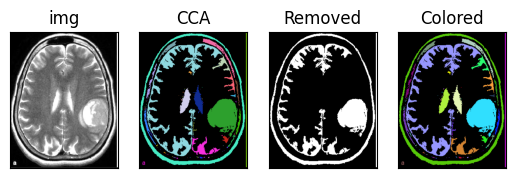

In [14]:
def connected_component_analysis(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply binary thresholding
    # _, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    _,thresh = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
    # Apply connected component analysis
    connectivity = 4  # 8-way (or) 4-way connectivity
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
    # Loop through each component
    output = np.zeros(img.shape, dtype="uint8")
    area_arr = []
    for i in range(1, num_labels):
        area_arr.append(stats[i, cv2.CC_STAT_AREA])
    
    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]  
        # print(area)
        # if (area > max(area_arr) - 1) and (area < max(area_arr) + 1):
        if area > 0:
            # print(area)
            # Labels stores all the IDs of the components on the each pixel
            # It has the same dimension as the threshold
            # So we'll check the component
            # then convert it to 255 value to mark it white
            componentMask = (labels == i).astype("uint8") * 255
            
            # Creating the Final output mask
            output = cv2.bitwise_or(output, componentMask)
    # cv2_imshow(img)
    # cv2_imshow(output)
    # # Create a random colormap
    colors = np.random.randint(0, 255, size=(num_labels, 3), dtype=np.uint8)

    # Set background label to black
    colors[0] = [0, 0, 0]

    # Create an output image with colored labels
    output = colors[labels]

    # Display the output image
    # cv2_imshow(output)
    output_1 = output
    area_arr.sort(reverse=True)
    output = np.zeros(img.shape, dtype="uint8")
    output_2 = np.zeros(img.shape, dtype="uint8")
    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]  
        # print(area)
        if (area in area_arr[:5]): # - 1) and (area < max(area_arr) + 1):
        # if area > 0:
            # print(area)
            # Labels stores all the IDs of the components on the each pixel
            # It has the same dimension as the threshold
            # So we'll check the component
            # then convert it to 255 value to mark it white
            componentMask = (labels == i).astype("uint8") * 255
            
            # Creating the Final output mask
            output = cv2.bitwise_or(output, componentMask)
            output_2 = cv2.bitwise_or(output, componentMask)

    colors = np.random.randint(0, 255, size=(num_labels, 3), dtype=np.uint8)

    # Set background label to black
    colors[0] = [0, 0, 0]

    # Create an output image with colored labels
    output_2 = colors[labels]

    titles = ['img','CCA','Removed', 'Colored']
    images = [img, output_1, output, output_2]
    for i in range(4):
        plt.subplot(1, 4,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()
    return output

ndata = []
for img in data:
    ndata.append(connected_component_analysis(img))
# connected_component_analysis(img_n)

#Intensity Based Features
1. Mean 
2. Intensity
3. Standard Deviation
4. Entropy
5. Variance

In [15]:
from skimage import io, img_as_float
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np

def intensity_based_features(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Calculate mean intensity
    mean_intensity = np.mean(image)

    # Calculate standard deviation
    std_deviation = np.std(image)

    # Calculate entropy
    image_entropy = entropy(image, disk(3))

    # Calculate variance
    variance = np.var(image)

    # Print results
    print("Mean Intensity: ", mean_intensity)
    print("Standard Deviation: ", std_deviation)
    print("Entropy: ", image_entropy, image_entropy.shape)
    print("Variance: ", variance)


intensity_based_features(img_y)
intensity_based_features(img_n)

Mean Intensity:  89.17613841163042
Standard Deviation:  90.39103784660917
Entropy:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (348, 287)
Variance:  8170.539722987131
Mean Intensity:  53.588684807256236
Standard Deviation:  59.52907645234393
Entropy:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (630, 630)
Variance:  3543.7109432690086


# Statistical Models
1. PCA
2. ICA

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

def give_ica(img, principle_components):
    # Splitting the image in R,G,B arrays.
 
    blue,green,red = cv2.split(img)
    #initialize PCA with first 20 principal components
    ica = FastICA(principle_components)
    
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = ica.fit_transform(red)
    red_inverted = ica.inverse_transform(red_transformed)
    
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = ica.fit_transform(green)
    green_inverted = ica.inverse_transform(green_transformed)
    
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = ica.fit_transform(blue)
    blue_inverted = ica.inverse_transform(blue_transformed)
    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)
    #viewing the compressed image
    plt.imshow(img_compressed)

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA

def give_pca(img, principle_components):
    # Splitting the image in R,G,B arrays.
    # pca = PCA(principle_components)
    # transformed = pca.fit_transform(img)
    # inverted = pca.inverse_transform(transformed)
    # cv2_imshow(inverted)
    # plt.imshow(inverted)
    # return
    # img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    blue,green,red = cv2.split(img)
    #initialize PCA with first 20 principal components
    pca = PCA(principle_components)
    
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
    
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
    
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)
    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)
    #viewing the compressed image
    cv2_imshow(img_compressed)
    # plt.imshow(img_compressed)

def give_pcag(img, principle_components):
    # Splitting the image in R,G,B arrays.
    pca = PCA(principle_components)
    transformed = pca.fit_transform(img)
    inverted = pca.inverse_transform(transformed)
    cv2_imshow(inverted)
    # plt.imshow(inverted)
    return
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    blue,green,red = cv2.split(img)
    #initialize PCA with first 20 principal components
    pca = PCA(principle_components)
    
    #Applying to red channel and then applying inverse transform to transformed array.
    red_transformed = pca.fit_transform(red)
    red_inverted = pca.inverse_transform(red_transformed)
    
    #Applying to Green channel and then applying inverse transform to transformed array.
    green_transformed = pca.fit_transform(green)
    green_inverted = pca.inverse_transform(green_transformed)
    
    #Applying to Blue channel and then applying inverse transform to transformed array.
    blue_transformed = pca.fit_transform(blue)
    blue_inverted = pca.inverse_transform(blue_transformed)
    img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)
    #viewing the compressed image
    cv2_imshow(img_compressed)
    # plt.imshow(img_compressed)

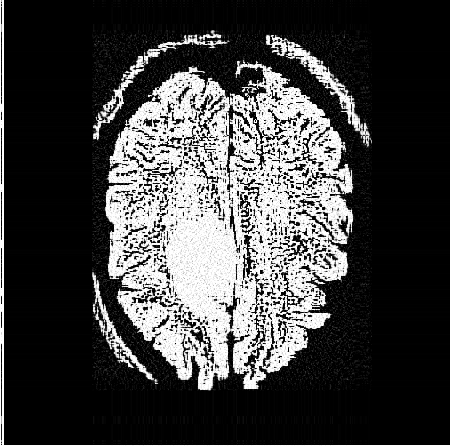

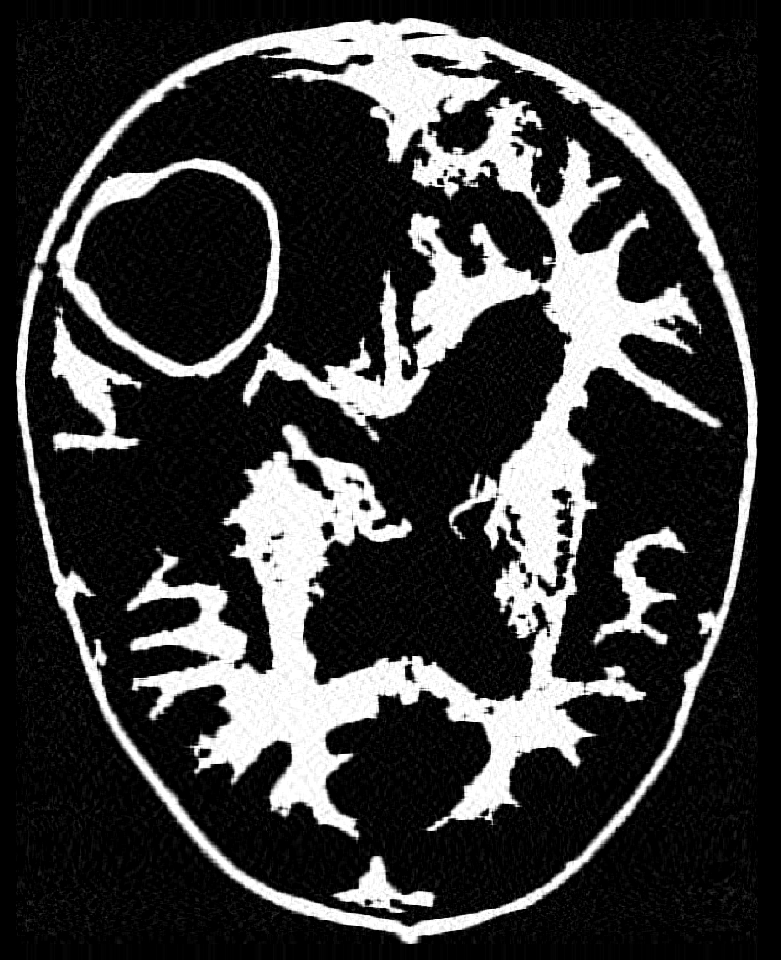

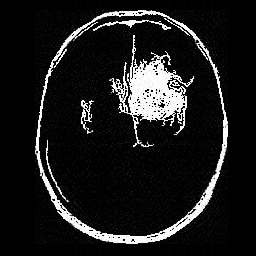

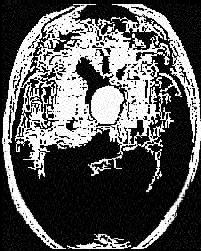

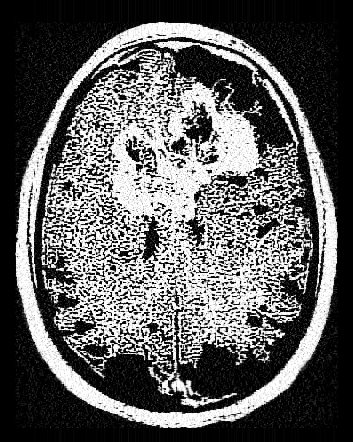

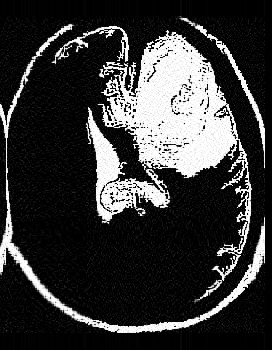

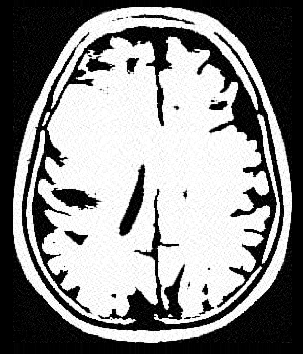

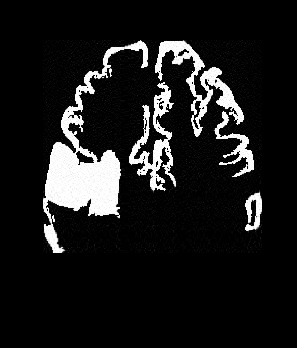

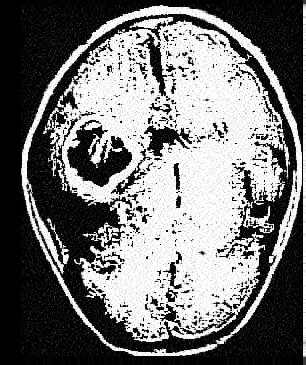

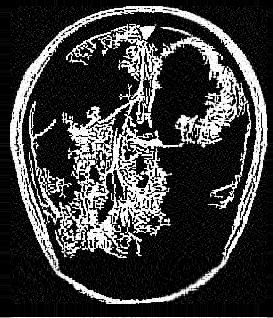

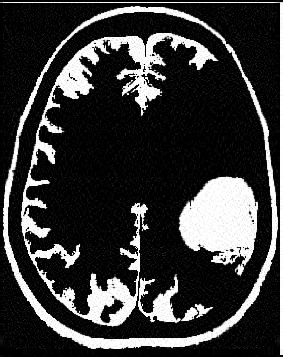

In [18]:
i = 0
for img in ndata:
    give_pcag(img, 100)
    # give_pca(data[i], 100)
    i += 1

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


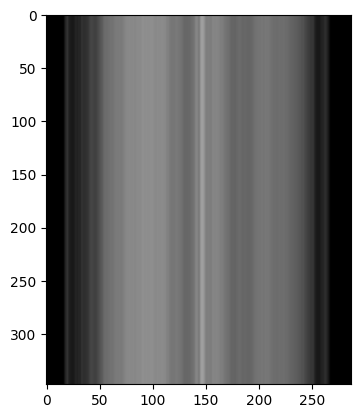

In [19]:
give_ica(img_y, 30)

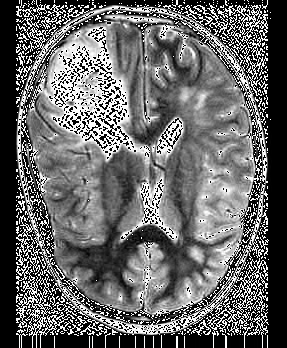

In [20]:
give_pca(img_y, 100)